In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/its-a-fraud/train.csv
/kaggle/input/its-a-fraud/test.csv
/kaggle/input/its-a-fraud/mock_submission.csv
/kaggle/input/transaction-fruad/Train_without_Data_balancing.csv
/kaggle/input/transaction-fruad/Test_without_Data_balancing.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
train=pd.read_csv("../input/transaction-fruad/Train_without_Data_balancing.csv")
train=train.drop(train.columns[0],axis=1)

In [5]:
train.shape

(442905, 166)

In [6]:
train.head()


,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C3,C5,C13,D1,D4,D10,D15,M6,V12,V14,V15,V17,V19,V23,V24,V25,V26,V27,V29,V35,V37,V38,V39,V41,V42,V44,V46,V47,V48,V53,V55,V56,V59,V61,V62,V65,V66,V67,V68,V75,V77,V78,V80,V82,V83,V86,V87,V88,V89,V95,V98,V99,V100,V104,V107,V108,V109,V110,V111,V112,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V129,V130,V131,V135,V136,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V300,V302,V303,V305,V310,V311,V312,V313,V314,V319,V320,ProductCD_is_H,ProductCD_is_R,ProductCD_is_S,ProductCD_is_W,card4_is_american express,card4_is_discover,card4_is_mastercard,card6_is_charge card,card6_is_credit,card6_is_debit or credit,P_emaildomain_is_aim.com,P_emaildomain_is_anonymous.com,P_emaildomain_is_aol.com,P_emaildomain_is_att.net,P_emaildomain_is_bellsouth.net,P_emaildomain_is_cableone.net,P_emaildomain_is_centurylink.net,P_emaildomain_is_charter.net,P_emaildomain_is_comcast.net,P_emaildomain_is_cox.net,P_emaildomain_is_earthlink.net,P_emaildomain_is_embarqmail.com,P_emaildomain_is_frontier.com,P_emaildomain_is_frontiernet.net,P_emaildomain_is_gmail,P_emaildomain_is_gmail.com,P_emaildomain_is_goodmail,P_emaildomain_is_hotmail.com,P_emaildomain_is_hotmail.es,P_emaildomain_is_hotmail.fr,P_emaildomain_is_icloud.com,P_emaildomain_is_juno.com,P_emaildomain_is_live.com,P_emaildomain_is_live.com.mx,P_emaildomain_is_live.fr,P_emaildomain_is_mac.com,P_emaildomain_is_mail.com,P_emaildomain_is_me.com,P_emaildomain_is_msn.com,P_emaildomain_is_netzero.net,P_emaildomain_is_optonline.net,P_emaildomain_is_outlook.com,P_emaildomain_is_outlook.es,P_emaildomain_is_prodigy.net.mx,P_emaildomain_is_protonmail.com,P_emaildomain_is_q.com,P_emaildomain_is_roadrunner.com,P_emaildomain_is_rocketmail.com,P_emaildomain_is_sbcglobal.net,P_emaildomain_is_sc.rr.com,P_emaildomain_is_suddenlink.net,P_emaildomain_is_verizon.net,P_emaildomain_is_yahoo.com,P_emaildomain_is_yahoo.com.mx,P_emaildomain_is_yahoo.de,P_emaildomain_is_yahoo.es,P_emaildomain_is_yahoo.fr,P_emaildomain_is_ymail.com
0,0.0,49.00,5033,269.0,150.0,224.0,330.0,87.0,2.0,0.0,0.0,21.0,14.0,370.0,14.0,375.0,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,98.0,0.00,0.00,0.00,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,98.0,0.0,0.00,49.00,98.0,0.00,0.00,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,57.95,4527,376.0,150.0,226.0,441.0,87.0,2.0,0.0,1.0,14.0,136.0,136.0,136.0,136.0,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,229.8,0.00,0.00,0.00,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,229.8,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,115.95,2772,512.0,150.0,226.0,143.0,87.0,2.0,0.0,1.0,14.0,193.0,495.0,495.0,495.0,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.00,107.95,107.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,107.95,107.95,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,100.00,14290,512.0,150.0,226.0,177.0,87.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0

In [7]:
Train_target_df=train.loc[:,"isFraud"]
train.drop("isFraud",axis=1,inplace=True)
x_train_df=train
y_train_df=Train_target_df

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size=0.20, random_state=0)

In [9]:
def Evalution(y_test,predictions): 
    score=metrics.accuracy_score(y_test, predictions)
    cm = metrics.confusion_matrix(y_test, predictions)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    print(classification_report(y_test, predictions))
def AUC(model,x_train,y_train,x_test,y_test,predictions_test,predictions_train):
    
    metrics.plot_roc_curve(model, x_train, y_train) 
    
    metrics.plot_roc_curve(model, x_test, y_test) 
    fpr1, tpr1, thresholds1=metrics.roc_curve(y_train,predictions_train)
    fpr, tpr, thresholds=metrics.roc_curve(y_test,predictions_test)
    # auc score
    print("AUC score for train: {}".format(metrics.auc(fpr1, tpr1)))
    print("AUC score for test: {}".format(metrics.auc(fpr, tpr)))
def Eval(model,X_over,y_over,x_test,y_test): 
    model.fit(X_over,y_over)
    predictions_test = model.predict(x_test)
    predictions_train = model.predict(X_over)
    Evalution(y_over,predictions_train)
    Evalution(y_test,predictions_test)
    AUC(model,X_over,y_over,x_test,y_test,predictions_test,predictions_train)

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [11]:
print(Counter(y_train))
undersample = RandomUnderSampler(sampling_strategy="majority")
X_over, y_over = undersample.fit_resample(x_train, y_train)
print(Counter(y_over))

Counter({0.0: 341979, 1.0: 12345})
Counter({0.0: 12345, 1.0: 12345})


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
# all parameters not specified are set to their defaults
pipe=Pipeline([('scaler',StandardScaler()),('logistic',LogisticRegression())])

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76     12345
         1.0       0.76      0.73      0.75     12345

    accuracy                           0.75     24690
   macro avg       0.75      0.75      0.75     24690
weighted avg       0.75      0.75      0.75     24690

              precision    recall  f1-score   support

         0.0       0.99      0.77      0.86     85429
         1.0       0.10      0.72      0.18      3152

    accuracy                           0.77     88581
   macro avg       0.54      0.75      0.52     88581
weighted avg       0.96      0.77      0.84     88581

AUC score for train: 0.7511543134872418
AUC score for test: 0.7450572154850826


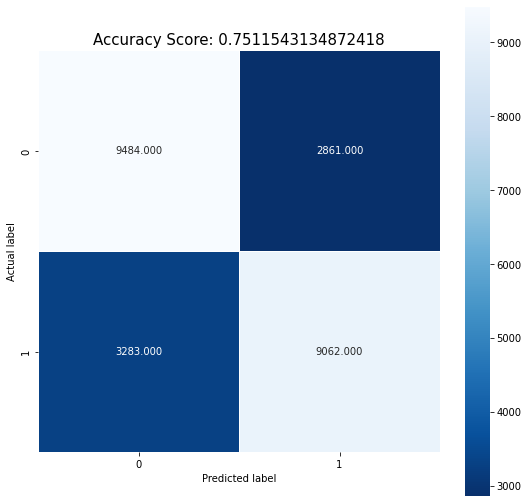

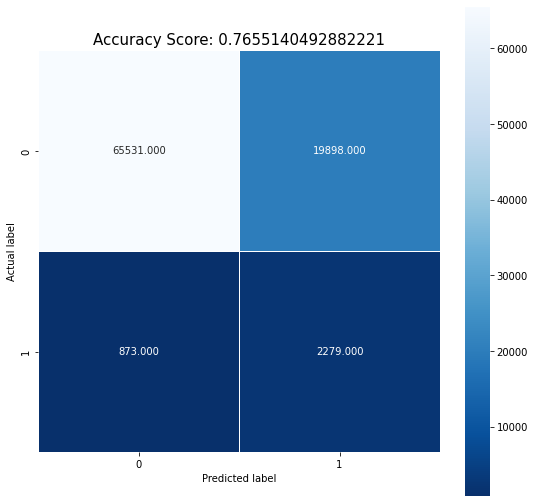

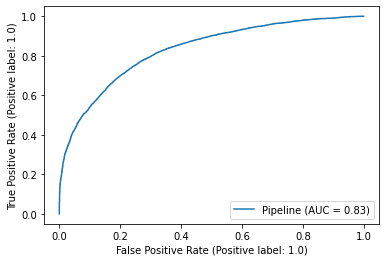

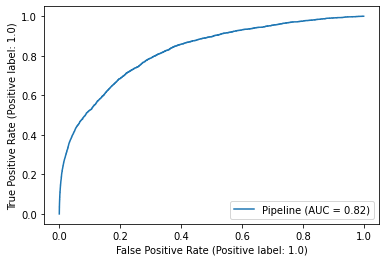

In [13]:
Eval(pipe,X_over,y_over,x_test,y_test)

In [14]:
from sklearn.linear_model import RidgeClassifierCV
pipe=Pipeline([('scaler',StandardScaler()),('RidgeCV',RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]))])

              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75     12345
         1.0       0.75      0.73      0.74     12345

    accuracy                           0.74     24690
   macro avg       0.74      0.74      0.74     24690
weighted avg       0.74      0.74      0.74     24690

              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86     85429
         1.0       0.10      0.71      0.17      3152

    accuracy                           0.76     88581
   macro avg       0.54      0.74      0.52     88581
weighted avg       0.95      0.76      0.83     88581

AUC score for train: 0.744066423653301
AUC score for test: 0.7377547723008977


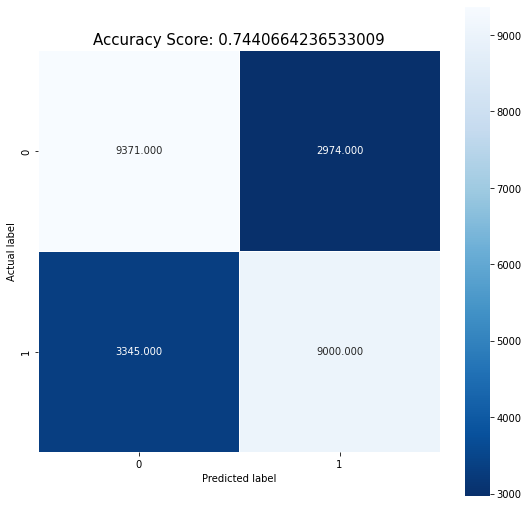

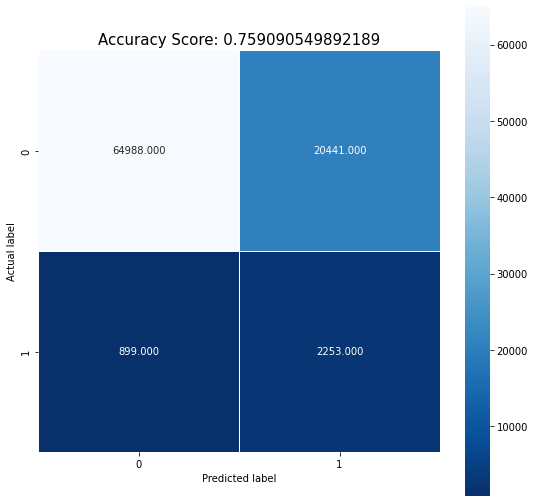

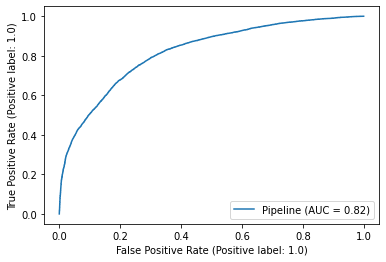

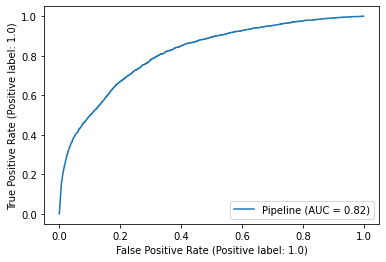

In [15]:
Eval(pipe,X_over,y_over,x_test,y_test)

### Decision Tree

#### without scalling

In [16]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    341979
         1.0       1.00      1.00      1.00     12345

    accuracy                           1.00    354324
   macro avg       1.00      1.00      1.00    354324
weighted avg       1.00      1.00      1.00    354324

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     85429
         1.0       0.51      0.55      0.53      3152

    accuracy                           0.96     88581
   macro avg       0.74      0.76      0.75     88581
weighted avg       0.97      0.96      0.97     88581

AUC score for train: 0.9984594532722635
AUC score for test: 0.7643731970289337


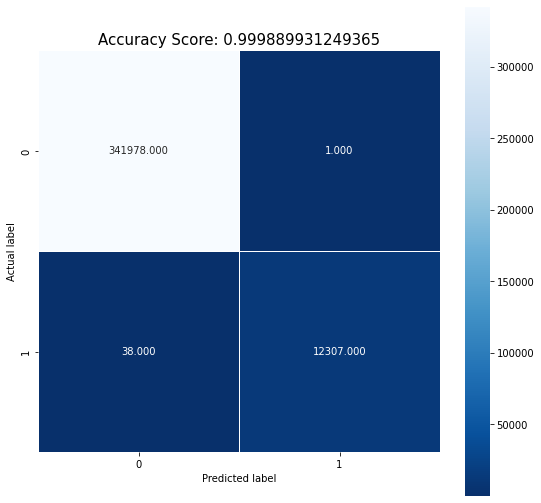

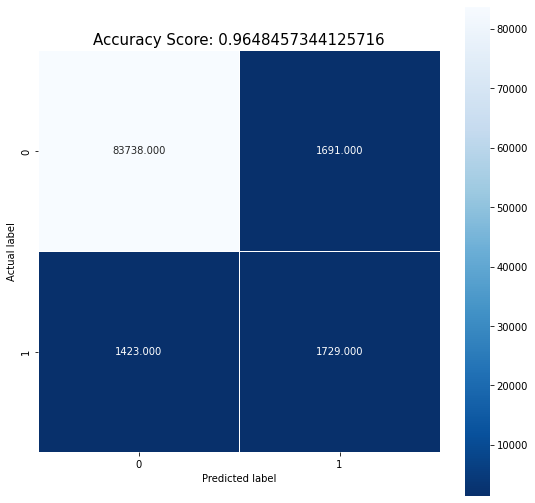

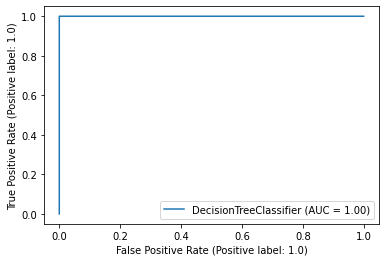

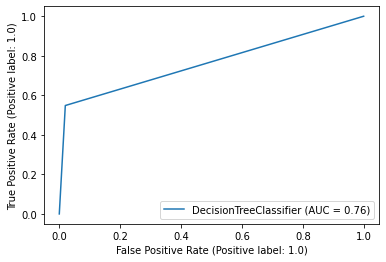

In [17]:
Eval(decision,x_train,y_train,x_test,y_test)

#### with scalling

In [18]:
from sklearn.tree import DecisionTreeClassifier
pipe=Pipeline([('scaler',StandardScaler()),('Decision',DecisionTreeClassifier(random_state=0))])

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    341979
         1.0       1.00      1.00      1.00     12345

    accuracy                           1.00    354324
   macro avg       1.00      1.00      1.00    354324
weighted avg       1.00      1.00      1.00    354324

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     85429
         1.0       0.51      0.55      0.53      3152

    accuracy                           0.96     88581
   macro avg       0.74      0.76      0.75     88581
weighted avg       0.97      0.96      0.97     88581

AUC score for train: 0.9984594532722635
AUC score for test: 0.7646670446583927


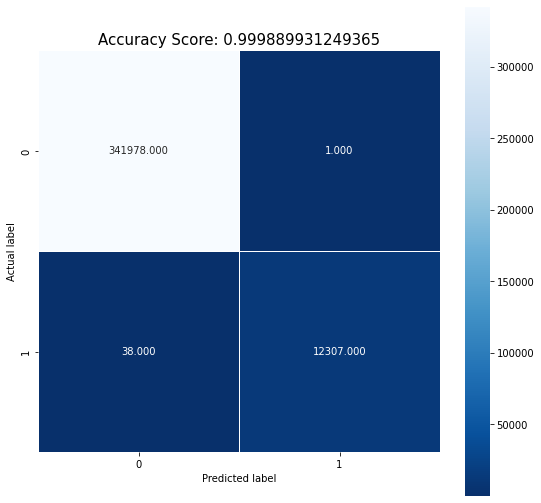

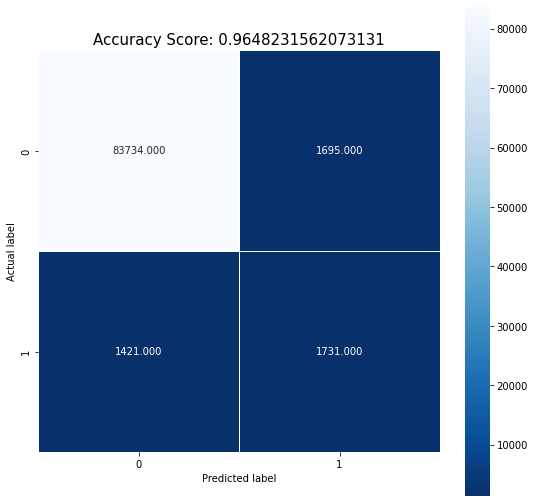

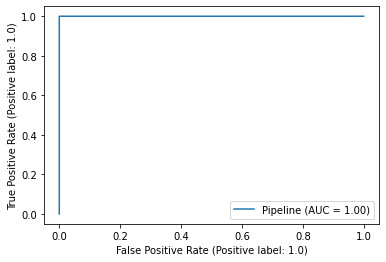

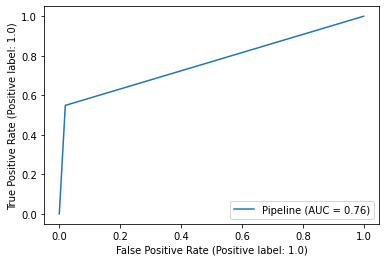

In [19]:
Eval(pipe,x_train,y_train,x_test,y_test)

### Random Forest

#### with scalling

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    341979
         1.0       1.00      1.00      1.00     12345

    accuracy                           1.00    354324
   macro avg       1.00      1.00      1.00    354324
weighted avg       1.00      1.00      1.00    354324

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     85429
         1.0       0.92      0.46      0.61      3152

    accuracy                           0.98     88581
   macro avg       0.95      0.73      0.80     88581
weighted avg       0.98      0.98      0.98     88581

AUC score for train: 0.9983769867389376
AUC score for test: 0.7291107536058828


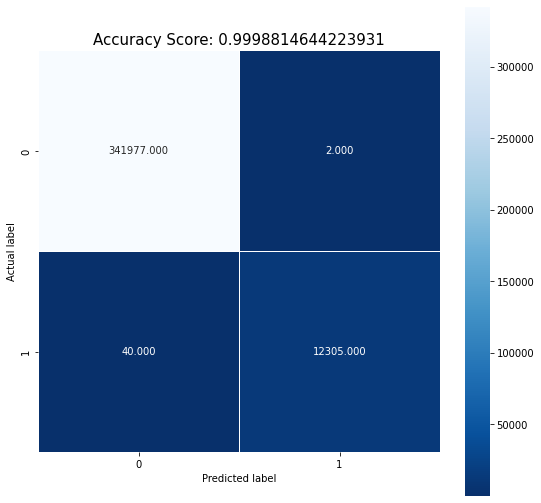

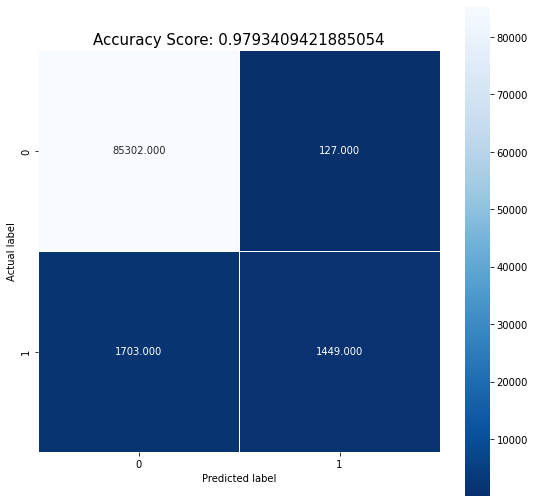

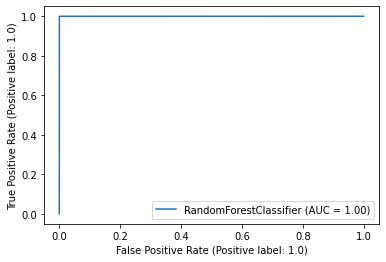

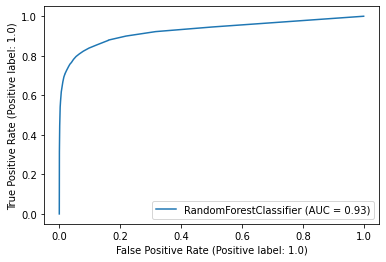

In [21]:
Eval(clf,x_train,y_train,x_test,y_test)

#### with scalling

In [22]:
pipe=Pipeline([('scaler',StandardScaler()),('random forest ',RandomForestClassifier())])

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    341979
         1.0       1.00      1.00      1.00     12345

    accuracy                           1.00    354324
   macro avg       1.00      1.00      1.00    354324
weighted avg       1.00      1.00      1.00    354324

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     85429
         1.0       0.92      0.46      0.61      3152

    accuracy                           0.98     88581
   macro avg       0.95      0.73      0.80     88581
weighted avg       0.98      0.98      0.98     88581

AUC score for train: 0.9983755246608569
AUC score for test: 0.7284762358393854


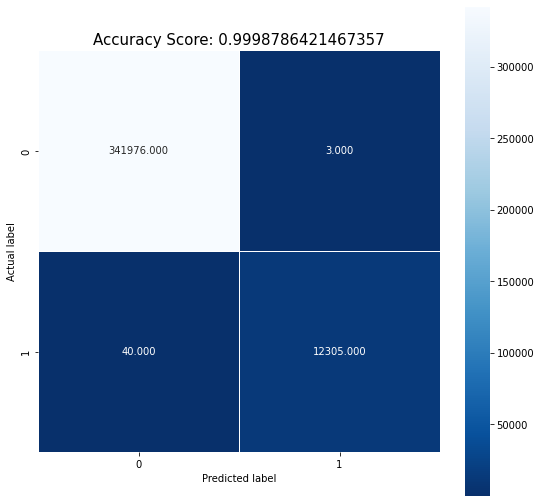

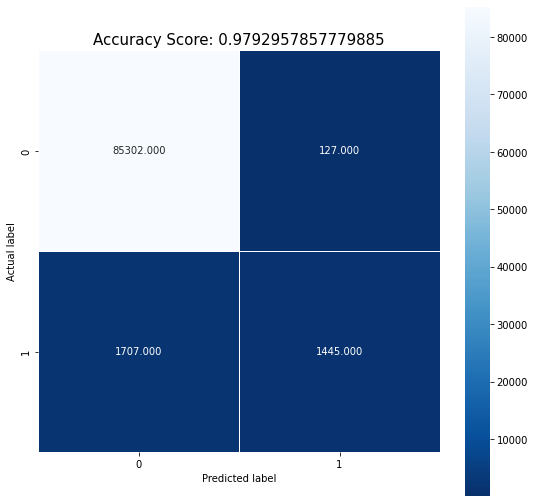

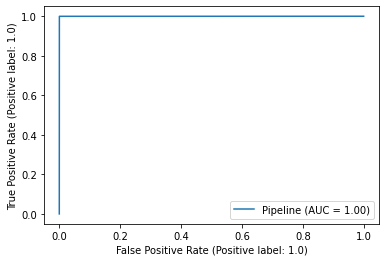

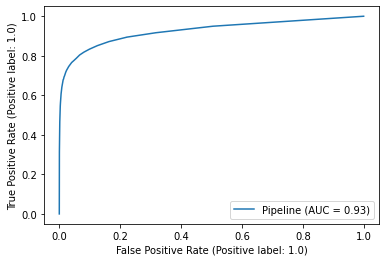

In [23]:
Eval(pipe,x_train,y_train,x_test,y_test)

### Decision tree output csv

In [24]:
test=pd.read_csv("../input/transaction-fruad/Test_without_Data_balancing.csv")
test=test.drop(test.columns[0],axis=1)

In [25]:
test.head()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C3,C5,C13,D1,D4,D10,D15,M6,V12,V14,V15,V17,V19,V23,V24,V25,V26,V27,V29,V35,V37,V38,V39,V41,V42,V44,V46,V47,V48,V53,V55,V56,V59,V61,V62,V65,V66,V67,V68,V75,V77,V78,V80,V82,V83,V86,V87,V88,V89,V95,V98,V99,V100,V104,V107,V108,V109,V110,V111,V112,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V129,V130,V131,V135,V136,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V300,V302,V303,V305,V310,V311,V312,V313,V314,V319,V320,ProductCD_is_H,ProductCD_is_R,ProductCD_is_S,ProductCD_is_W,card4_is_american express,card4_is_discover,card4_is_mastercard,card6_is_charge card,card6_is_credit,card6_is_debit or credit,P_emaildomain_is_aim.com,P_emaildomain_is_anonymous.com,P_emaildomain_is_aol.com,P_emaildomain_is_att.net,P_emaildomain_is_bellsouth.net,P_emaildomain_is_cableone.net,P_emaildomain_is_centurylink.net,P_emaildomain_is_charter.net,P_emaildomain_is_comcast.net,P_emaildomain_is_cox.net,P_emaildomain_is_earthlink.net,P_emaildomain_is_embarqmail.com,P_emaildomain_is_frontier.com,P_emaildomain_is_frontiernet.net,P_emaildomain_is_gmail,P_emaildomain_is_gmail.com,P_emaildomain_is_goodmail,P_emaildomain_is_hotmail.com,P_emaildomain_is_hotmail.es,P_emaildomain_is_hotmail.fr,P_emaildomain_is_icloud.com,P_emaildomain_is_juno.com,P_emaildomain_is_live.com,P_emaildomain_is_live.com.mx,P_emaildomain_is_live.fr,P_emaildomain_is_mac.com,P_emaildomain_is_mail.com,P_emaildomain_is_me.com,P_emaildomain_is_msn.com,P_emaildomain_is_netzero.net,P_emaildomain_is_optonline.net,P_emaildomain_is_outlook.com,P_emaildomain_is_outlook.es,P_emaildomain_is_prodigy.net.mx,P_emaildomain_is_protonmail.com,P_emaildomain_is_q.com,P_emaildomain_is_roadrunner.com,P_emaildomain_is_rocketmail.com,P_emaildomain_is_sbcglobal.net,P_emaildomain_is_sc.rr.com,P_emaildomain_is_suddenlink.net,P_emaildomain_is_verizon.net,P_emaildomain_is_yahoo.com,P_emaildomain_is_yahoo.com.mx,P_emaildomain_is_yahoo.de,P_emaildomain_is_yahoo.es,P_emaildomain_is_yahoo.fr,P_emaildomain_is_ymail.com
0,325.000,12932,361.0,150.0,226.0,126.0,87.0,3.0,0.0,0.0,0.0,0.0,0.0,166.0,166.0,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,37.257,14276,177.0,185.0,137.0,325.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100.000,16506,554.0,150.0,226.0,299.0,87.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,57.950,9500,321.0,150.0,226.0,441.0,87.0,1.0,0.0,1.0,2.0,35.0,0.0,35.0,35.0,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.

In [26]:
predictions_test = decision.predict(test)

In [27]:
Test_df_predictions=pd.DataFrame(data=predictions_test,columns=["isFraud"])
Test_df_predictions.reset_index(inplace=True)
Test_df_predictions.rename(columns={"index":"Id"},inplace=True)
Test_df_predictions.head()

,Id,isFraud
0,0,0.0
1,1,1.0
2,2,0.0
3,3,0.0
4,4,0.0


In [28]:
Test_df_predictions.to_csv("./randomforest_predictions.csv",index=False)